In [1]:
# ------------------ 1. Import Libraries ------------------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ------------------ 2. Load Dataset ------------------
df = pd.read_csv(r"C:\Users\ss724\Downloads\ResearchInformation3.csv")
df.head()


,Department,Gender,HSC,SSC,Income,Hometown,Computer,Preparation,Gaming,Attendance,Job,English,Extra,Semester,Last,Overall
0,Business Administration,Male,4.17,4.84,"Low (Below 15,000)",Village,3,More than 3 Hours,0-1 Hour,80%-100%,No,3,Yes,6th,3.220,3.350
1,Business Administration,Female,4.92,5.00,"Upper middle (30,000-50,000)",City,3,0-1 Hour,0-1 Hour,80%-100%,No,3,Yes,7th,3.467,3.467
2,Business Administration,Male,5.00,4.83,"Lower middle (15,000-30,000)",Village,3,0-1 Hour,More than 3 Hours,80%-100%,No,4,Yes,3rd,4.000,3.720
3,Business Administration,Male,4.00,4.50,"High (Above 50,000)",City,5,More than 3 Hours,More than 3 Hours,80%-100%,No,5,Yes,4th,3.800,3.750
4,Business Administration,Female,2.19,3.17,"Lower middle (15,000-30,000)",Village,3,0-1 Hour,2-3 Hours,80%-100%,No,3,Yes,4th,3.940,3.940


In [2]:
# Drop non-numeric or ID columns if any (adjust as needed)
df.drop(columns=['id'], errors='ignore', inplace=True)

# Target column
target = 'Overall'

# One-hot encode categorical variables
X = df.drop(columns=[target])
X = pd.get_dummies(X, drop_first=True)
y = df[target]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [3]:
# Use Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [4]:
# Predict on test data
y_pred = model.predict(X_test)

# Evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"✅ RMSE: {rmse:.2f}")
print(f"✅ R² Score: {r2:.2f}")


✅ RMSE: 0.17
✅ R² Score: 0.92


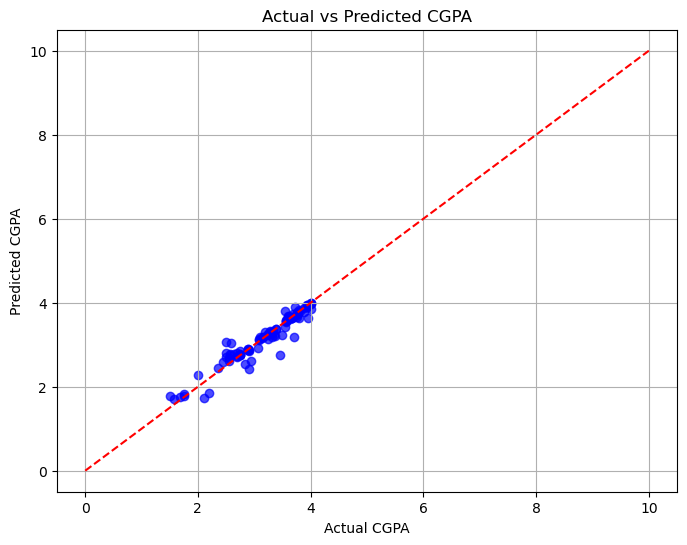

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.xlabel("Actual CGPA")
plt.ylabel("Predicted CGPA")
plt.title("Actual vs Predicted CGPA")
plt.plot([0, 10], [0, 10], '--', color='red')  # Diagonal line
plt.grid(True)
plt.show()


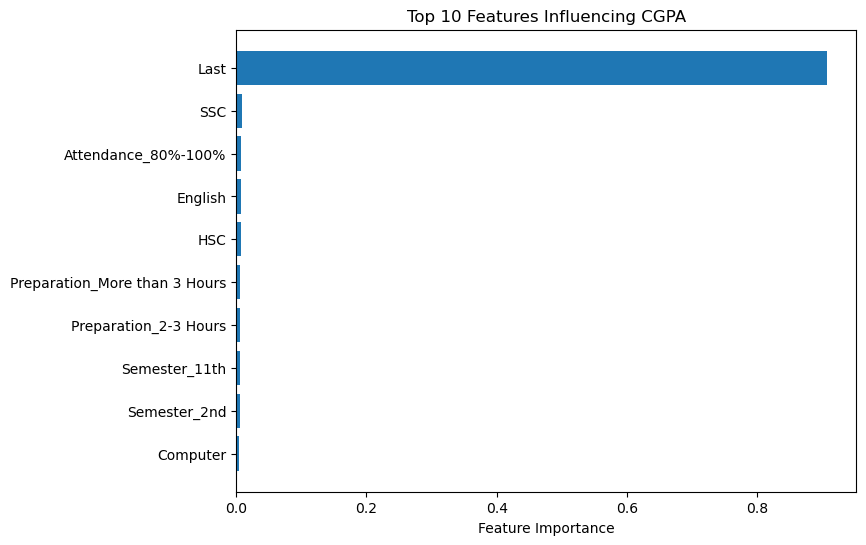

In [6]:
# Get feature importances
importances = model.feature_importances_
features = X.columns

# Plot top 10 important features
indices = np.argsort(importances)[-10:]
plt.figure(figsize=(8,6))
plt.barh(features[indices], importances[indices])
plt.xlabel("Feature Importance")
plt.title("Top 10 Features Influencing CGPA")
plt.show()
